In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_churn_data.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [5]:
df.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,297
TotalCharges,0
TechSupport,0
Churn,0


In [6]:
df["InternetService"] = df["InternetService"].fillna("")
df.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,0
TotalCharges,0
TechSupport,0
Churn,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [9]:
numeric_columns_data = df.select_dtypes(include = ["number"])

In [10]:
import matplotlib.pyplot as plt


In [11]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


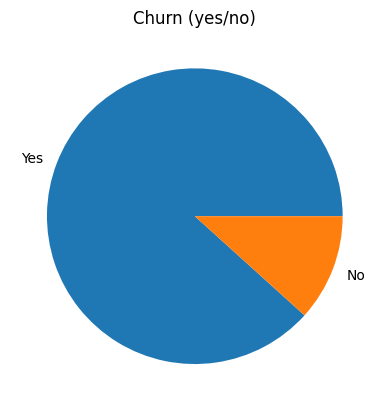

In [12]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn (yes/no)")
plt.ylabel("")
plt.show()

In [13]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [14]:
df.groupby("Churn")["MonthlyCharges"].mean()

,MonthlyCharges
Churn,
No,62.54641
Yes,75.96077


In [15]:
df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [16]:
df.groupby("Churn")["Tenure"].mean()

,Tenure
Churn,
No,30.264957
Yes,17.476784


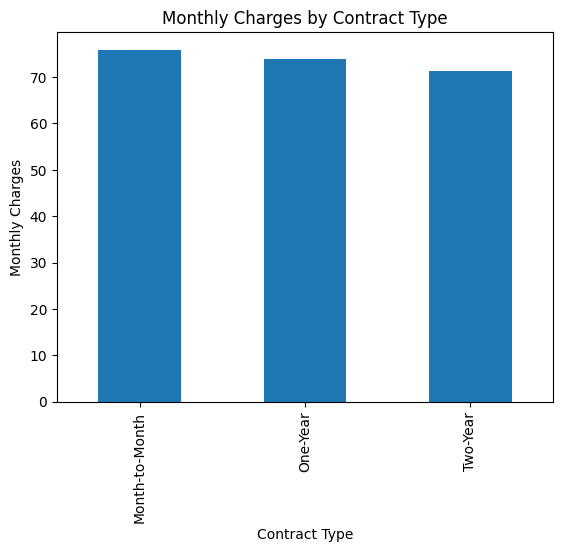

In [17]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.title("Monthly Charges by Contract Type")
plt.ylabel("Monthly Charges")
plt.xlabel("Contract Type")
plt.show()

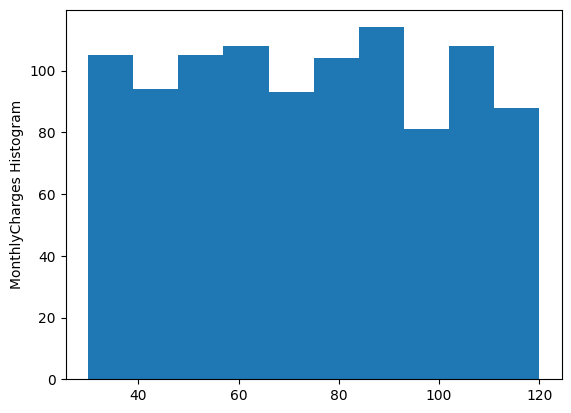

In [18]:
plt.hist(df["MonthlyCharges"])
plt.ylabel("MonthlyCharges Histogram")
plt.show()

In [19]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


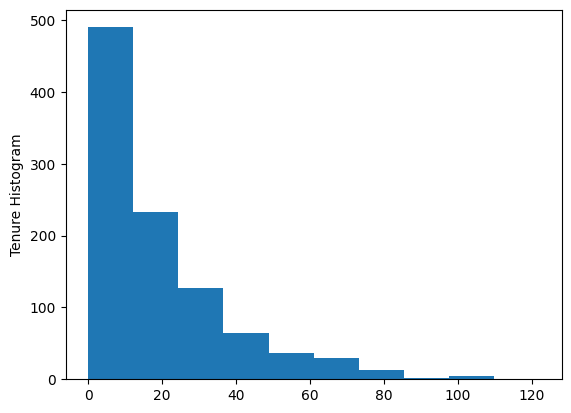

In [20]:
plt.hist(df["Tenure"])
plt.ylabel("Tenure Histogram")
plt.show()

In [21]:
y = df[["Churn"]]
X = df[["Age","Gender","Tenure","MonthlyCharges"]]

In [22]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [23]:

X["Gender"]=X["Gender"].apply(lambda x:1 if x=="Female" else 0)

/tmp/ipython-input-1027375743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"]=X["Gender"].apply(lambda x:1 if x=="Female" else 0)


In [24]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [25]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [26]:
y["Churn"] = y["Churn"].apply(lambda x: 1 if x=="Yes" else 0)
y

/tmp/ipython-input-86903608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] = y["Churn"].apply(lambda x: 1 if x=="Yes" else 0)


,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [31]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [32]:
X_test = scaler.fit_transform(X_test)

In [33]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
  print("Accuracy score on model is {}".format(accuracy_score(y_test, predictions)))

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_model = LogisticRegression()

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = log_model.predict(X_test)

In [42]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
param_grid = {
    "n_neighbors": [3,5,7,9,11],
    "weights" : ["uniform", "distance"],
}


In [52]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [53]:
gridkn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [54]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [55]:
y_pred = gridkn.predict(X_test)

In [56]:
modelperformance(y_pred)

Accuracy score on model is 0.88


In [57]:
from sklearn.svm import SVC

In [58]:
svm = SVC()

In [59]:
param_grid = {
    "C" : [0.01, 0.1, 0.5, 1],
    "kernel" : ["linear", "rbf", "poly"],
}

In [60]:
gridsvc = GridSearchCV(SVC(), param_grid, cv=5)

In [61]:
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [62]:
y_pred = gridsvc.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [63]:
modelperformance(y_pred)

Accuracy score on model is 0.88


In [64]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
param_grid = {
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2,5, 10],
    "min_samples_leaf" : [1, 2, 4],
}

In [72]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [73]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [74]:
y_pred = grid_tree.predict(X_test)

In [75]:
modelperformance(y_pred)

Accuracy score on model is 0.835


In [76]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [77]:
param_grid = {
    "n_estimators": [32, 64, 128, 256],
    "max_features" : [2, 3, 4],
    "bootstrap" : [True, False],
}

In [78]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)

In [79]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [80]:
y_pred = grid_rfc.predict(X_test)

In [81]:
modelperformance(y_pred)

Accuracy score on model is 0.88
